/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 54.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categori

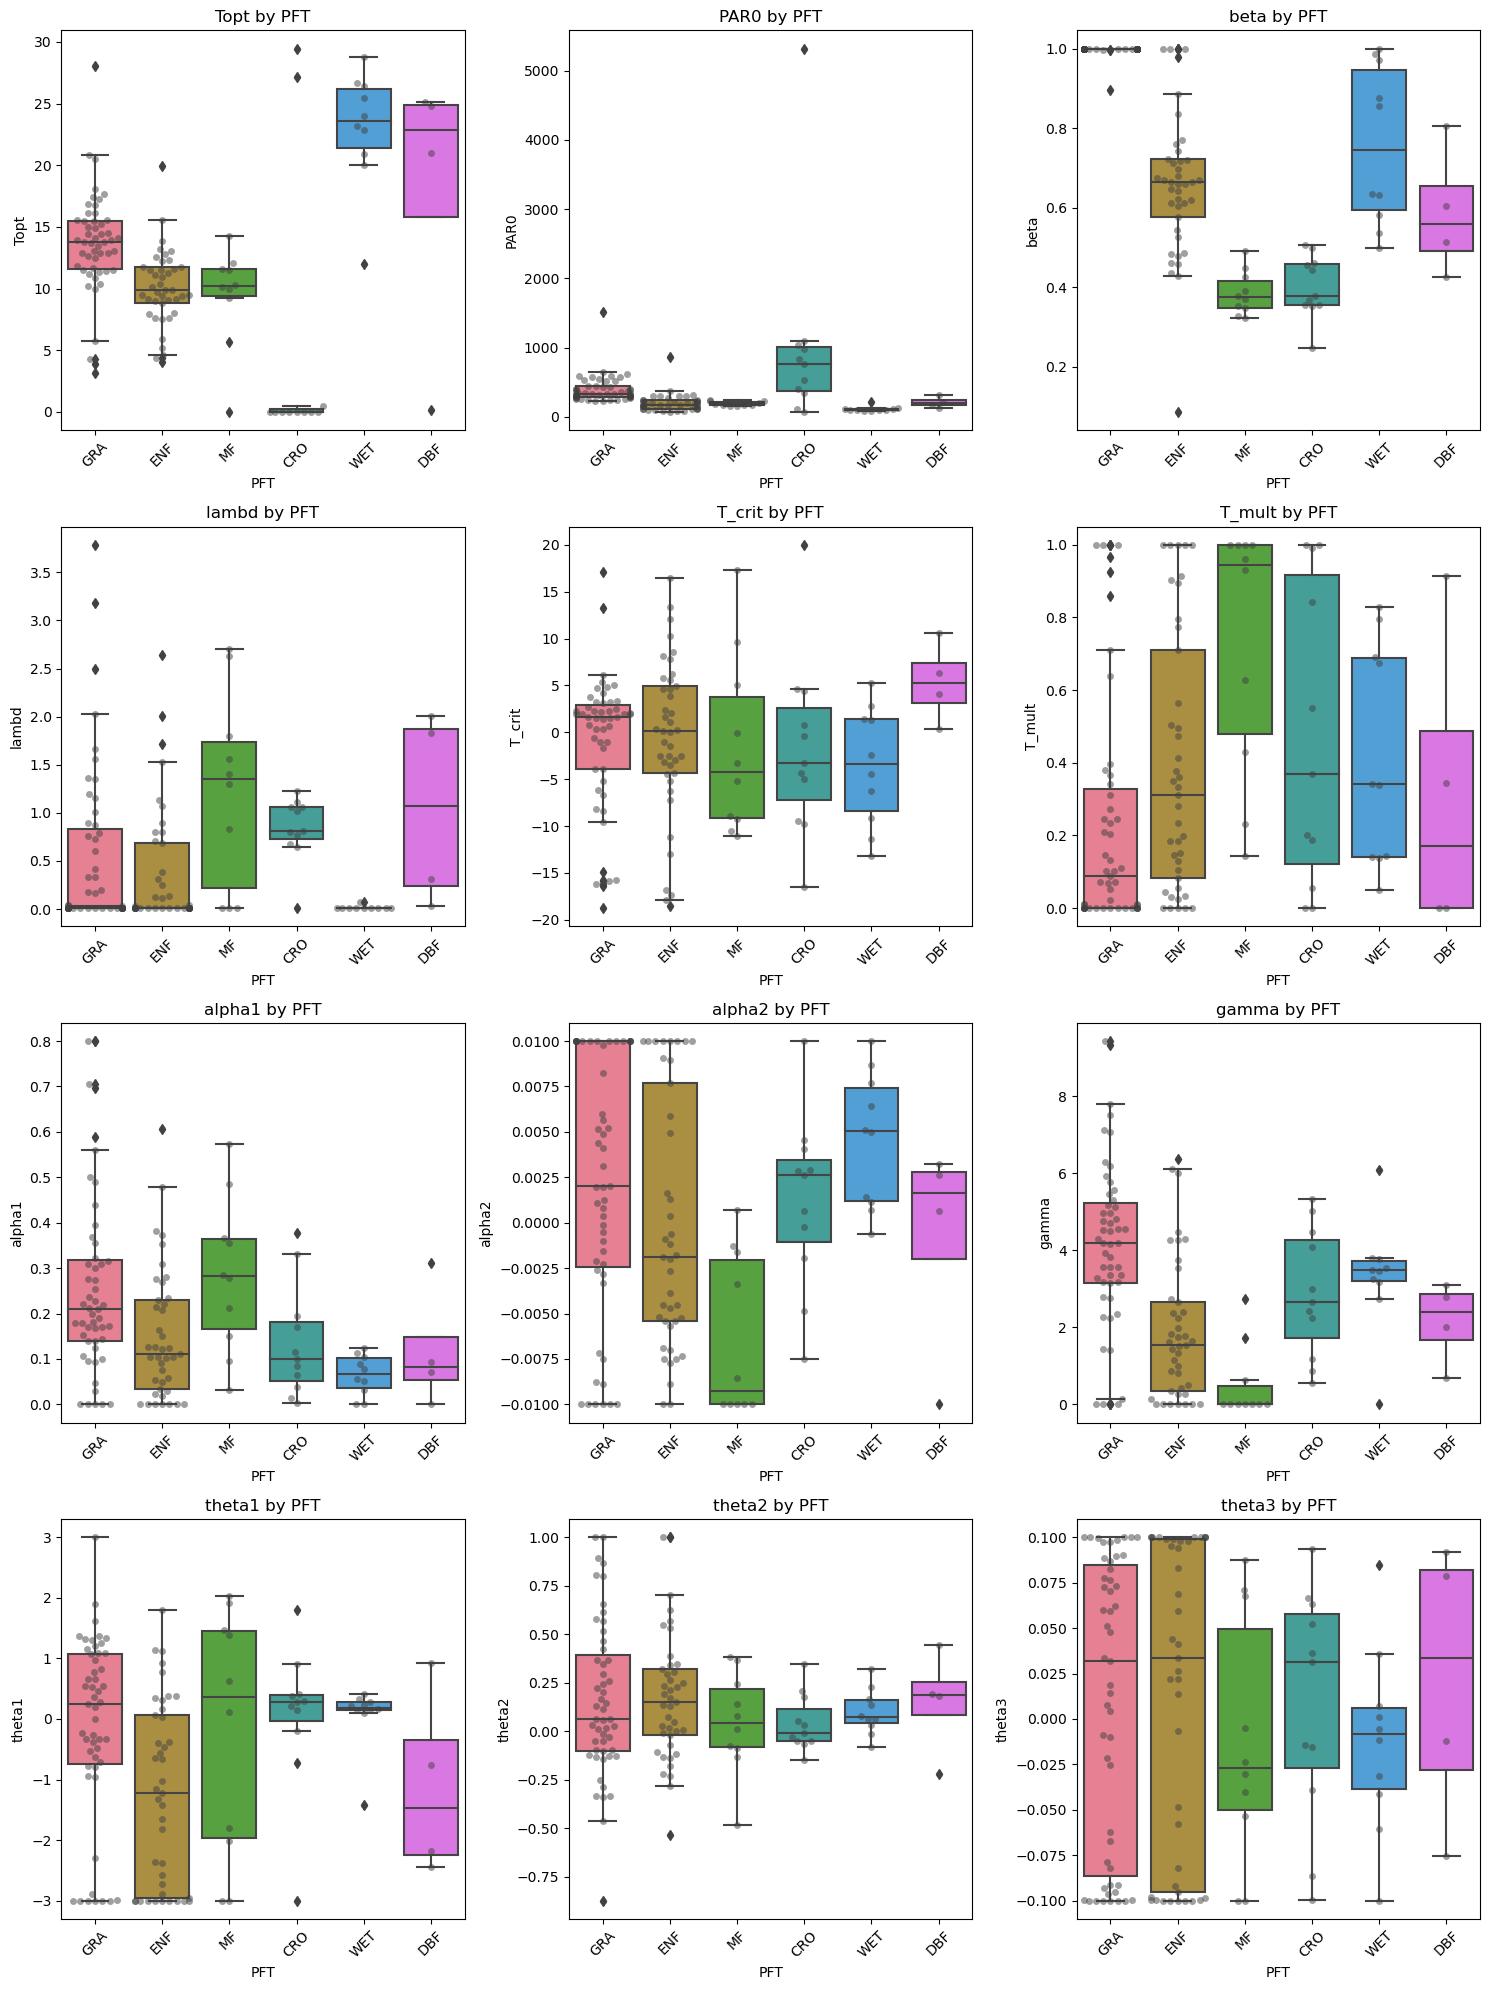

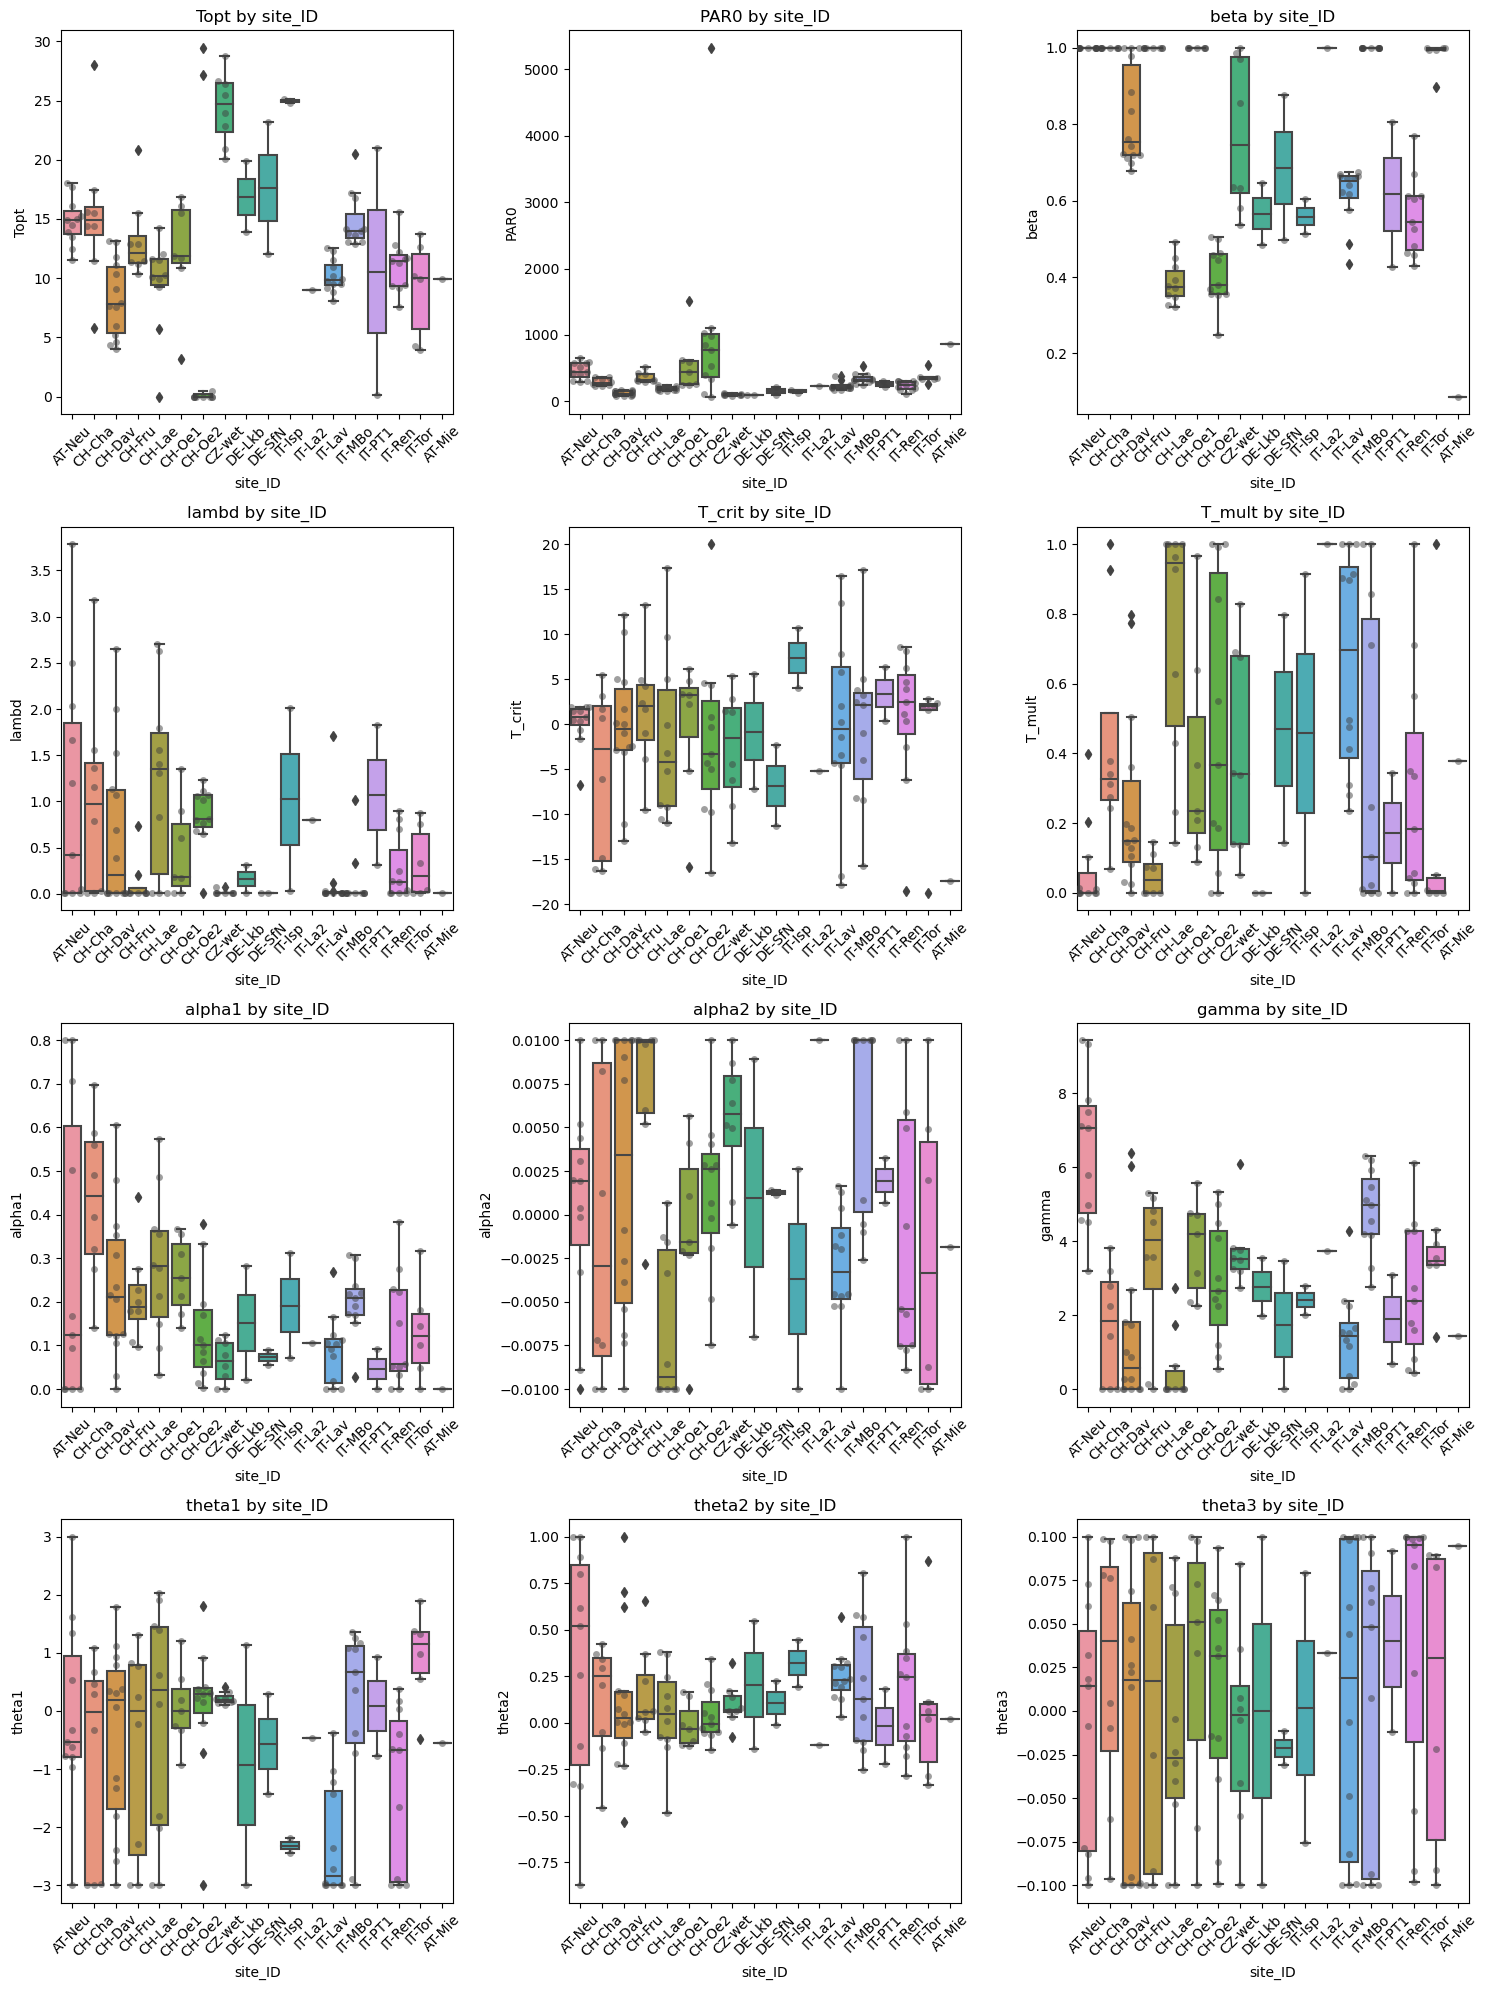

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

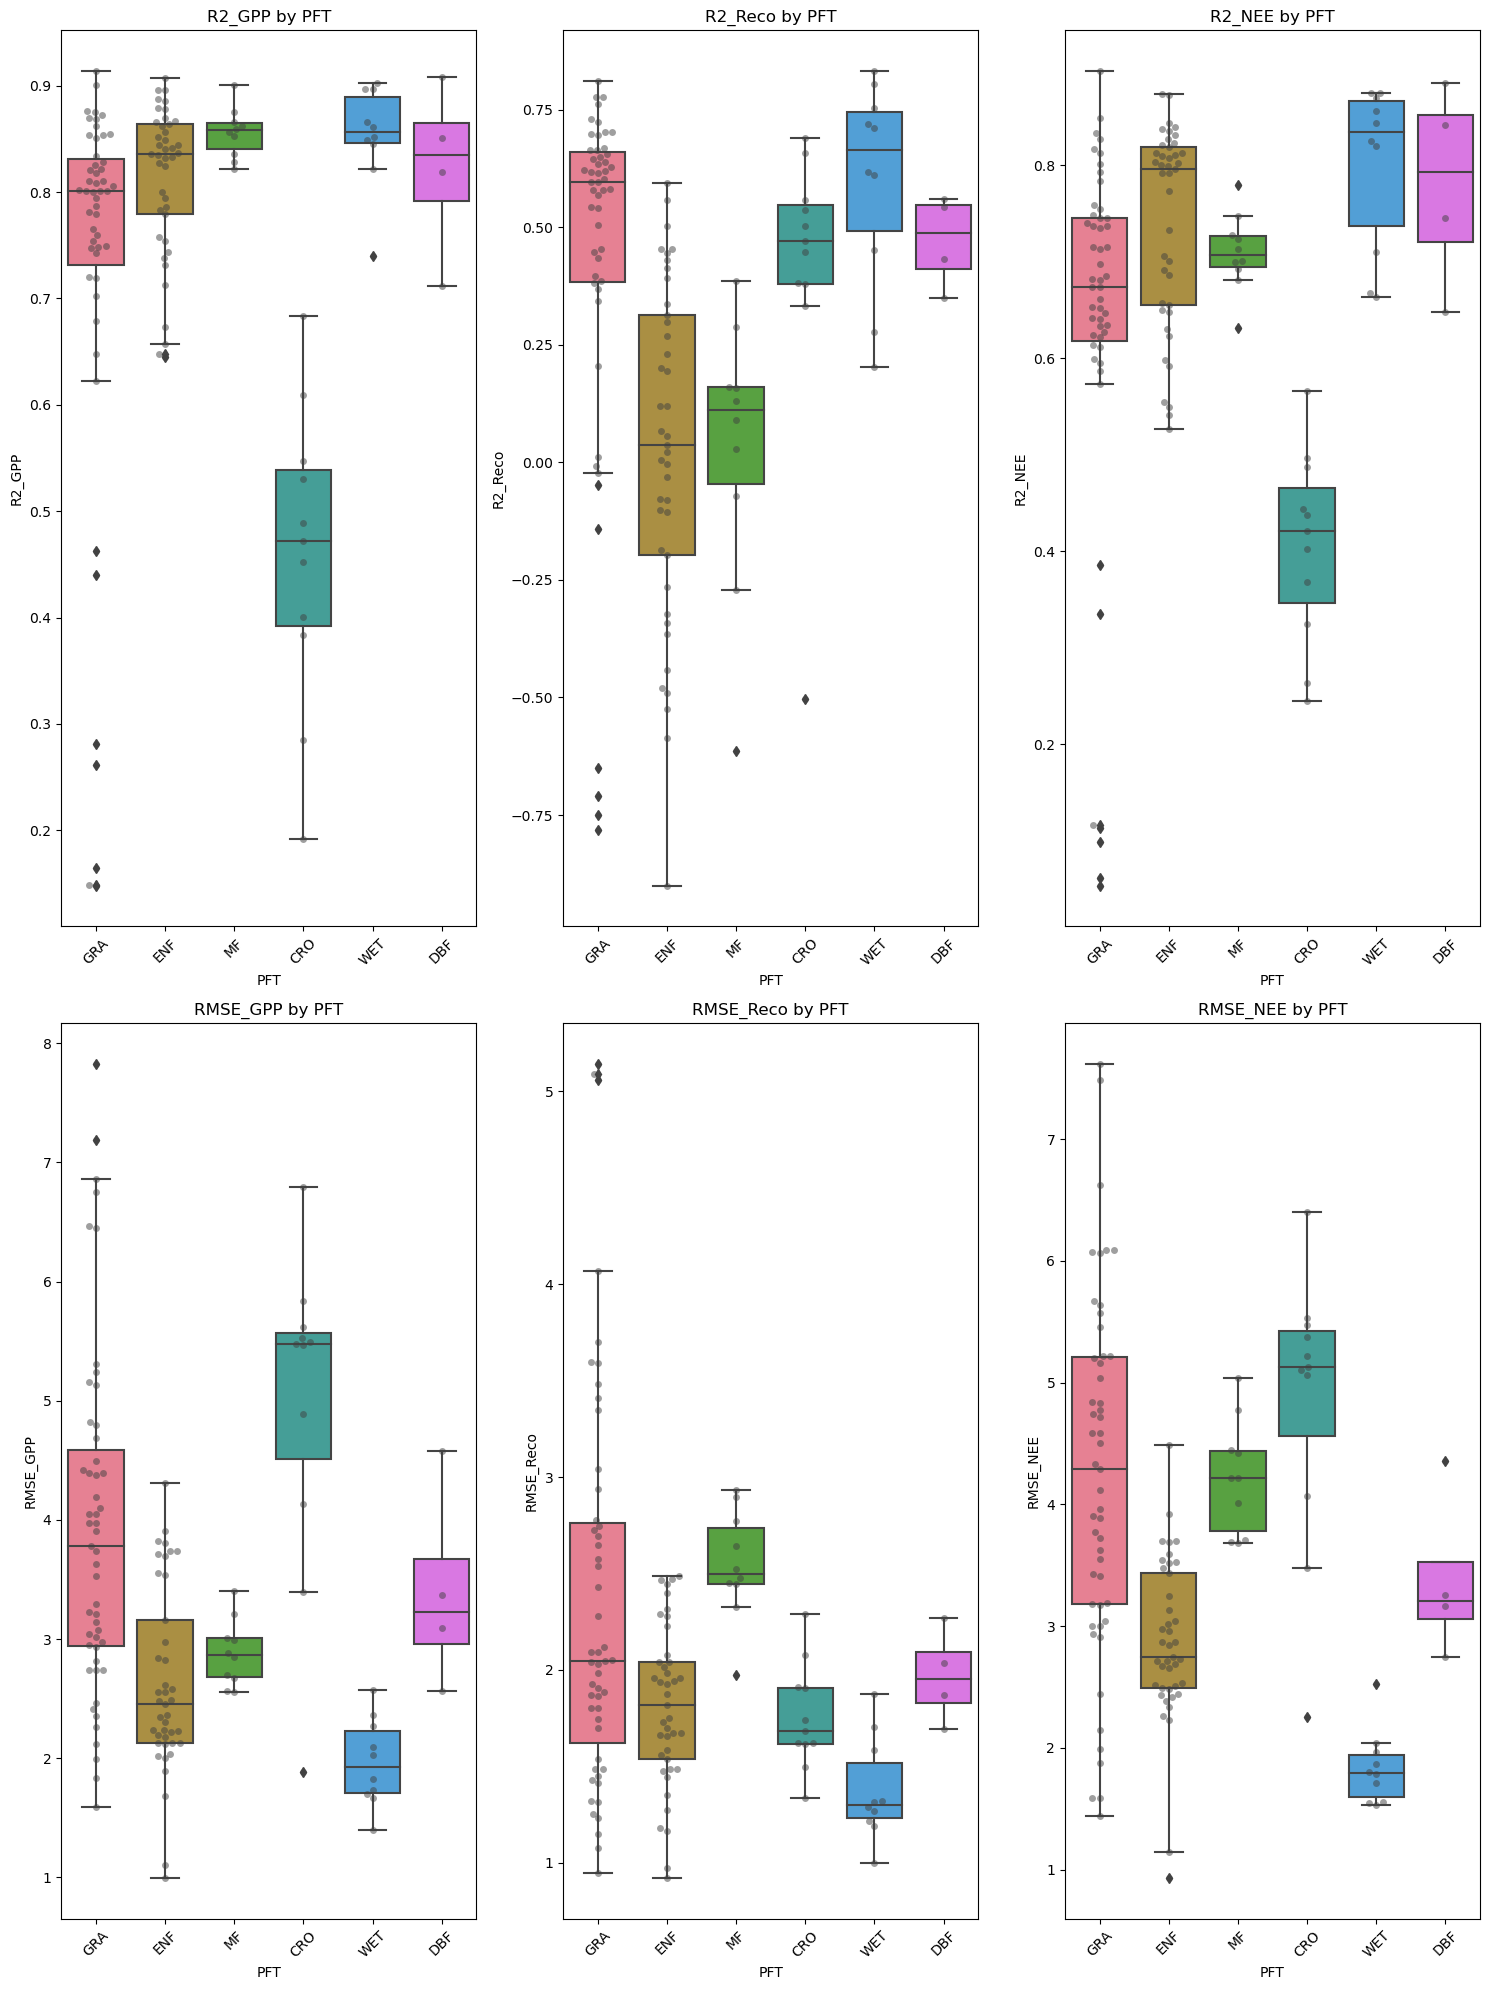

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_parameters = pd.read_excel("Tuned_params_VPRM_new_diff_evo_V2_10.xlsx")

parameters_to_plot = ['Topt', 'PAR0', 'beta', 'lambd', 'T_crit', 'T_mult', 'alpha1', 'alpha2', 'gamma', 'theta1', 'theta2', 'theta3']

color_palette = 'husl'  # 'muted', 'deep', 'husl'
sns.set_palette(color_palette)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, parameter in enumerate(parameters_to_plot):
    sns.boxplot(x='PFT', y=parameter, data=df_parameters, ax=axes[i])
    sns.swarmplot(x='PFT', y=parameter, data=df_parameters, color="0.25", alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{parameter} by PFT')
    axes[i].set_xlabel('PFT')
    axes[i].set_ylabel(parameter)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(
    "paramerters_boxplot_PFTs_VPRM_new_diff_evo_V2"
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)


fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, parameter in enumerate(parameters_to_plot):
    sns.boxplot(x='site_ID', y=parameter, data=df_parameters, ax=axes[i])
    sns.swarmplot(x='site_ID', y=parameter, data=df_parameters, color="0.25", alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{parameter} by site_ID')
    axes[i].set_xlabel('site_ID')
    axes[i].set_ylabel(parameter)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(
    "paramerters_boxplot_siteIDs_VPRM_new_diff_evo_V2"
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

parameters_to_plot = ['R2_GPP', 'R2_Reco', 'R2_NEE', 'RMSE_GPP', 'RMSE_Reco', 'RMSE_NEE']
color_palette = 'husl'  # 'muted', 'deep', 'husl'
sns.set_palette(color_palette)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, parameter in enumerate(parameters_to_plot):
    sns.boxplot(x='PFT', y=parameter, data=df_parameters, ax=axes[i])
    sns.swarmplot(x='PFT', y=parameter, data=df_parameters, color="0.25", alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{parameter} by PFT')
    axes[i].set_xlabel('PFT')
    axes[i].set_ylabel(parameter)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(
    "paramerters_boxplot_PFTs_R2_RMSE_"
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)